In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import model
import plot_tools
import clock_work_axion
import reheating
import transport_equation
from common import constants, cosmology

In [114]:
Gamma_phi = 1e7
H_inf = 2e10
mR = 8
m_phi = 1e2/ 1e9# [GeV]
f_eff = 1e13

eps = clock_work_axion.calc_eps(mR)
f = clock_work_axion.calc_f(f_eff, eps)
t0, initial = reheating.calc_initial_reheating(H_inf)
M = m_phi / eps
tf_1 = cosmology.switch_hubble_and_time_rad_dom(M)
tf_2 = cosmology.switch_hubble_and_time_rad_dom(m_phi) * 1e3

Text(0, 0.5, 'phi / f')

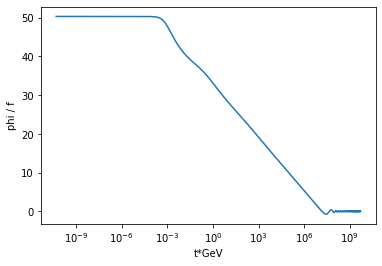

In [115]:
T_fn, H_fn, _, final = reheating.solve_reheating_eq(t0, tf, initial, Gamma_phi)
sol = solve_ivp(clock_work_axion.rhs, (t0, tf_2), (clock_work_axion.theta_to_phi_over_f(1, eps), 0), args=(eps, M, H_fn), method="RK45", rtol=1e-8)
plt.semilogx(sol.t, sol.y[0])
plt.xlabel("t*GeV")
plt.ylabel("phi / f")

In [93]:
tf_1, tf_2

(3.960053475399063e-16, 5000000.0)

In [99]:
t0, tf_1, tf_2

(5e-11, 3.960053475399063e-16, 5000.0)

Text(0, 0.5, 'V_eff / GeV^4')

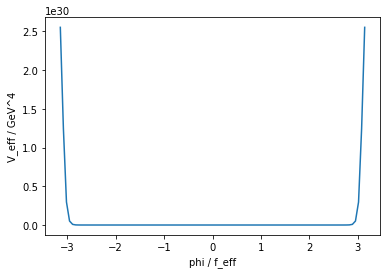

In [103]:
theta_range = np.linspace(-np.pi, np.pi, 100)
phi_over_f_range = f_eff * theta_range / f # not a linear map
plt.plot(theta_range, clock_work_axion.calc_V_eff_over_f_sq(phi_over_f_range, eps, M))
plt.xlabel("phi / f_eff")
plt.ylabel("V_eff / GeV^4")